# **Data PreProcessing**

## **step:1Data Collection from Multiple Sources**

In [2]:
import pandas as pd

water_df = pd.read_csv("/content/sample_data/ water_demand/daily_water_consumption_10000_rows (2).csv")
weather_df = pd.read_csv("/content/sample_data/ water_demand/weather_data (2).csv")  # Corrected: This file contains weather data
population_df = pd.read_csv("/content/sample_data/ water_demand/population_data (1).csv") # Corrected: This file contains population data

# Merge on date and region_name for weather data
df = water_df.merge(weather_df, on=["date", "region_name"], how="left", suffixes=('_water', '_weather'))
# Merge population data on region_name
df = df.merge(population_df, on="region_name", how="left", suffixes=("", "_pop"))

### Check column names in each dataframe

In [3]:

print("Water DF columns:", water_df.columns.tolist())
print("Weather DF columns:", weather_df.columns.tolist())
print("Population DF columns:", population_df.columns.tolist())


Water DF columns: ['date', 'day_of_week', 'is_weekend', 'is_holiday', 'month', 'season', 'temperature_celsius', 'max_temperature_celsius', 'min_temperature_celsius', 'humidity_percent', 'rainfall_mm', 'wind_speed_kmph', 'heat_index', 'region_name', 'state', 'area_type', 'population', 'number_of_households', 'industrial_activity_index', 'water_consumption_liters', 'prev_day_consumption', 'prev_7day_avg_consumption', 'prev_30day_avg_consumption', 'same_day_last_year_consumption', 'water_supplied_liters', 'water_loss_percentage', 'reservoir_level_percent', 'pipe_maintenance_flag', 'supply_restriction_flag', 'demand_supply_gap', 'consumption_per_capita', 'temperature_change_from_yesterday', 'rainfall_last_3_days', 'input_temperature', 'input_humidity', 'input_rainfall', 'input_day_type', 'scenario_temperature_change']
Weather DF columns: ['date', 'region_name', 'temperature_celsius', 'humidity_percent', 'rainfall_mm', 'wind_speed_kmph']
Population DF columns: ['region_name', 'state', 'area

### Understand structure, size, types, missing values

In [4]:
df.shape
df.head()


,date,day_of_week,is_weekend,is_holiday,month,season,temperature_celsius_water,max_temperature_celsius,min_temperature_celsius,humidity_percent_water,...,input_day_type,scenario_temperature_change,temperature_celsius_weather,humidity_percent_weather,rainfall_mm_weather,wind_speed_kmph_weather,state_pop,area_type_pop,population_pop,number_of_households_pop
0,2019-01-01,Tuesday,0,1,1,Winter,35.2,37.9,31.4,49,...,Holiday,3,24.4,47.4,0.8,11.5,Andhra Pradesh,Urban,1200000,280000
1,2019-01-02,Wednesday,0,0,1,Winter,24.9,29.5,20.1,42,...,Weekday,-3,21.0,77.3,0.0,7.9,Andhra Pradesh,Urban,750000,180000
2,2019-01-03,Thursday,0,0,1,Winter,26.9,29.3,21.7,54,...,Weekday,3,28.6,64.8,1.9,6.5,Andhra Pradesh,Rural,480000,130000
3,2019-01-04,Friday,0,0,1,Winter,28.1,32.9,24.9,45,...,Weekday,1,24.3,48.5,1.7,13.2,Andhra Pradesh,Urban,1200000,280000
4,2019-01-05,Saturday,1,0,1,Winter,38.8,43.1,34.6,41,...,Weekday,-3,21.3,43.5,0.9,9.0,Andhra Pradesh,Semi-Urban,650000,160000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               10000 non-null  object 
 1   day_of_week                        10000 non-null  object 
 2   is_weekend                         10000 non-null  int64  
 3   is_holiday                         10000 non-null  int64  
 4   month                              10000 non-null  int64  
 5   season                             10000 non-null  object 
 6   temperature_celsius_water          10000 non-null  float64
 7   max_temperature_celsius            10000 non-null  float64
 8   min_temperature_celsius            10000 non-null  float64
 9   humidity_percent_water             10000 non-null  int64  
 10  rainfall_mm_water                  10000 non-null  float64
 11  wind_speed_kmph_water              10000 non-null  floa

In [6]:

df.describe()

,is_weekend,is_holiday,month,temperature_celsius_water,max_temperature_celsius,min_temperature_celsius,humidity_percent_water,rainfall_mm_water,wind_speed_kmph_water,heat_index,...,input_temperature,input_humidity,input_rainfall,scenario_temperature_change,temperature_celsius_weather,humidity_percent_weather,rainfall_mm_weather,wind_speed_kmph_weather,population_pop,number_of_households_pop
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000
mean,0.285600,0.049200,6.471800,31.971980,35.470260,27.470250,62.456600,7.535580,8.99401,38.217640,...,31.971980,62.456600,7.535580,0.055000,29.705580,64.908850,5.772170,9.042500,8.067680e+05,194173.000000
std,0.451722,0.216296,3.455691,5.755516,5.829825,5.836963,13.262726,4.332116,3.48051,5.900488,...,5.755516,13.262726,4.332116,3.189293,5.573508,14.558183,7.374817,3.510014,2.492498e+05,52068.101365
min,0.000000,0.000000,1.000000,22.000000,24.100000,16.000000,40.000000,0.000000,3.00000,26.100000,...,22.000000,40.000000,0.000000,-5.000000,20.000000,40.000000,0.000000,3.000000,4.800000e+05,130000.000000
25%,0.000000,0.000000,3.000000,27.000000,30.400000,22.400000,51.000000,3.700000,5.90000,33.200000,...,27.000000,51.000000,3.700000,-3.000000,25.600000,52.275000,0.800000,6.000000,6.500000e+05,160000.000000
50%,0.000000,0.000000,6.000000,32.000000,35.500000,27.500000,62.000000,7.600000,9.00000,38.250000,...,32.000000,62.000000,7.600000,0.000000,28.900000,64.900000,1.700000,9.000000,7.500000e+05,180000.000000
75%,1.000000,0.000000,9.000000,36.900000,40.400000,32.400000,74.000000,11.300000,12.00000,43.200000,...,36.900000,74.000000,11.300000,3.000000,33.800000,77.500000,9.800000,12.200000,9.500000e+05,220000.000000
max,1.000000,1.000000,12.000000,42.000000,47.000000,38.900000,85.000000,15.000000,15.00000,50.500000,...,42.000000,85.000000,15.000000,5.000000,42.000000,90.000000,25.000000,15.000000,1.200000e+06,280000.000000


## **step3:Data Cleaning**

#### Removed Duplicates,Fixed Data types

In [7]:
# Drop duplicate columns created during merges
df = df.drop(columns=[
    'state_pop',
    'area_type_pop',
    'population_pop',
    'number_of_households_pop'
], errors='ignore')

# Convert 'date' column to datetime objects
df['date'] = pd.to_datetime(df['date'])

# Unify redundant columns by dropping the duplicates from the merged weather and population dataframes
df.drop(columns=['temperature_celsius_weather', 'humidity_percent_weather', 'rainfall_mm_weather', 'wind_speed_kmph_weather'], inplace=True, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   date                               10000 non-null  datetime64[ns]
 1   day_of_week                        10000 non-null  object        
 2   is_weekend                         10000 non-null  int64         
 3   is_holiday                         10000 non-null  int64         
 4   month                              10000 non-null  int64         
 5   season                             10000 non-null  object        
 6   temperature_celsius_water          10000 non-null  float64       
 7   max_temperature_celsius            10000 non-null  float64       
 8   min_temperature_celsius            10000 non-null  float64       
 9   humidity_percent_water             10000 non-null  int64         
 10  rainfall_mm_water                  

In [8]:
df.drop_duplicates(inplace=True)
print("Duplicates removed. New shape:", df.shape)


Duplicates removed. New shape: (10000, 38)


In [9]:
#Fix Data Types
df['date'] = pd.to_datetime(df['date'])
df['is_holiday'] = df['is_holiday'].astype(int)
print(df.dtypes)


date                                 datetime64[ns]
day_of_week                                  object
is_weekend                                    int64
is_holiday                                    int64
month                                         int64
season                                       object
temperature_celsius_water                   float64
max_temperature_celsius                     float64
min_temperature_celsius                     float64
humidity_percent_water                        int64
rainfall_mm_water                           float64
wind_speed_kmph_water                       float64
heat_index                                  float64
region_name                                  object
state                                        object
area_type                                    object
population                                    int64
number_of_households                          int64
industrial_activity_index                     int64
water_consum

## step4:DATA TRANSFORMATION

In [10]:
# Identify categorical columns for one-hot encoding
categorical_cols = [
    'day_of_week',
    'season',
    'region_name',
    'state',
    'area_type',
    'input_day_type'
]

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Handle NaN values introduced by lag features by dropping them
df.dropna(inplace=True)

print("Shape of DataFrame after one-hot encoding and dropping NaNs:", df.shape)
print("First 5 rows of the transformed DataFrame:")
print(df.head())

Shape of DataFrame after one-hot encoding and dropping NaNs: (10000, 48)
First 5 rows of the transformed DataFrame:
        date  is_weekend  is_holiday  month  temperature_celsius_water  \
0 2019-01-01           0           1      1                       35.2   
1 2019-01-02           0           0      1                       24.9   
2 2019-01-03           0           0      1                       26.9   
3 2019-01-04           0           0      1                       28.1   
4 2019-01-05           1           0      1                       38.8   

   max_temperature_celsius  min_temperature_celsius  humidity_percent_water  \
0                     37.9                     31.4                      49   
1                     29.5                     20.1                      42   
2                     29.3                     21.7                      54   
3                     32.9                     24.9                      45   
4                     43.1                  

## step5:Exploratory Data Analysis (EDA)

### Understand patterns, trends, seasonality, relationships

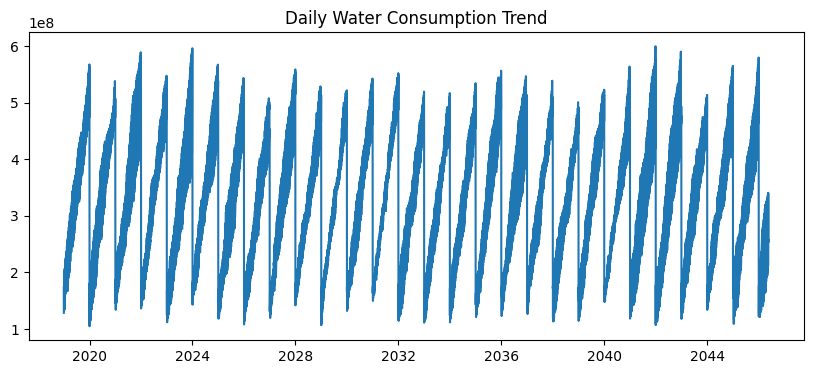

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(df['date'], df['water_consumption_liters'])
plt.title("Daily Water Consumption Trend")
plt.show()


### *Seasonal Analysis*

In [13]:
season_avg_data = {}

# Get list of one-hot encoded season columns
season_cols = [col for col in df.columns if col.startswith('season_')]

# Determine the implicitly dropped season (e.g., 'Monsoon')
# This season is represented when all other season_X columns are False
other_seasons_condition = (df[season_cols] == False).all(axis=1)
if not df.loc[other_seasons_condition, 'water_consumption_liters'].empty:
    season_avg_data['Monsoon'] = df.loc[other_seasons_condition, 'water_consumption_liters'].mean()

# For the other seasons, directly use their one-hot encoded columns
for col in season_cols:
    season_name = col.replace('season_', '')
    if not df.loc[df[col] == True, 'water_consumption_liters'].empty:
        season_avg_data[season_name] = df.loc[df[col] == True, 'water_consumption_liters'].mean()

season_avg = pd.Series(season_avg_data)
print(season_avg)


Monsoon         3.518065e+08
Post-Monsoon    4.379937e+08
Summer          2.481260e+08
Winter          2.796023e+08
dtype: float64


### *Correlation Analysis*

<Axes: >

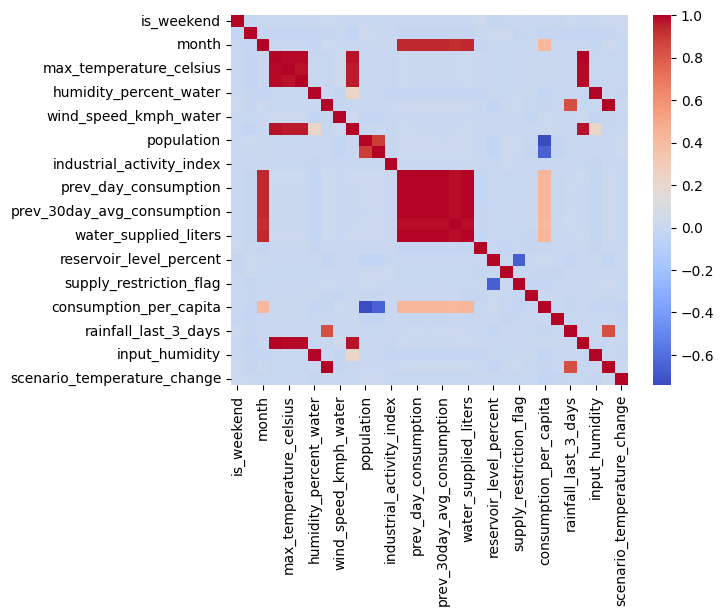

In [14]:
import seaborn as sns

corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap="coolwarm")


### *CORRELATION HEATMAP*

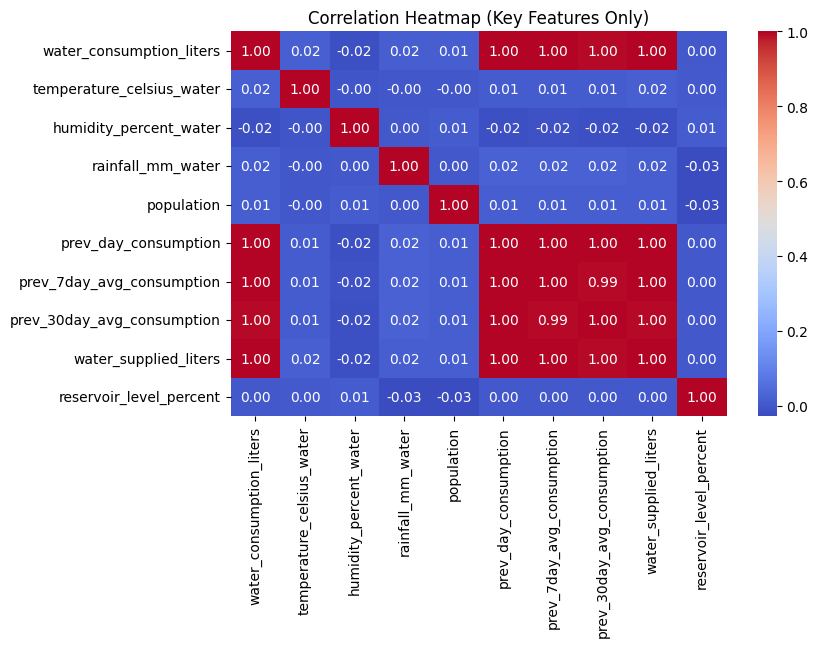

In [15]:
#CORRELATION HEATMAP
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only important features
selected_cols = [
    'water_consumption_liters',
    'temperature_celsius_water',
    'humidity_percent_water',
    'rainfall_mm_water',
    'population',
    'prev_day_consumption',
    'prev_7day_avg_consumption',
    'prev_30day_avg_consumption',
    'water_supplied_liters',
    'reservoir_level_percent'
]

corr = df[selected_cols].corr()

plt.figure(figsize=(8,5)) # Reduced figsize
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap (Key Features Only)")
plt.show()

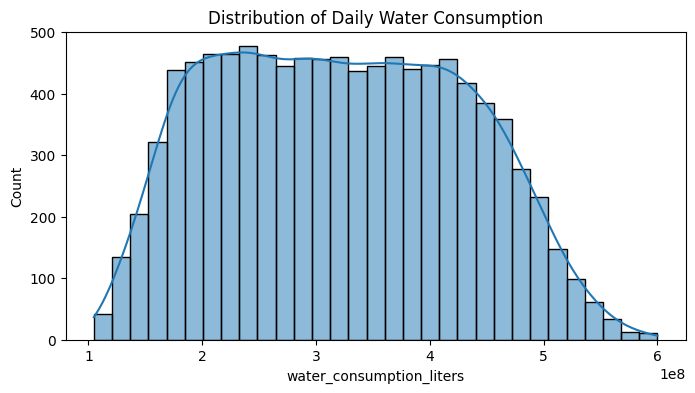

In [16]:
#TARGET VARIABLE DISTRIBUTION
plt.figure(figsize=(8,4))
sns.histplot(df['water_consumption_liters'], kde=True)
plt.title("Distribution of Daily Water Consumption")
plt.show()


### TIME-SERIES TREND

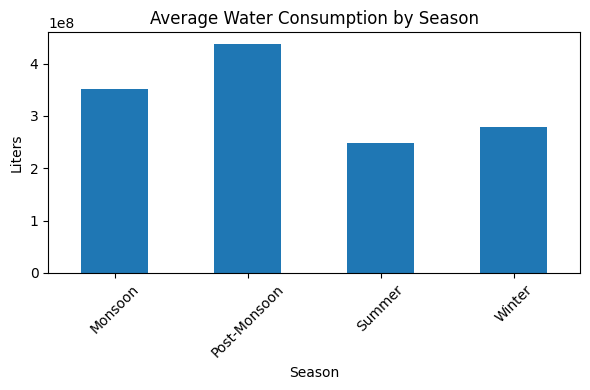

In [17]:
#TIME-SERIES TREND (LINE PLOT)
# Calculate mean water consumption for each season using the one-hot encoded columns
season_avg_data = {}

# Assuming 'Monsoon' was the dropped category (all other season flags are False)
season_avg_data['Monsoon'] = df.loc[
    (df['season_Post-Monsoon'] == False) &
    (df['season_Summer'] == False) &
    (df['season_Winter'] == False),
    'water_consumption_liters'
].mean()

# For the other seasons, directly use their one-hot encoded columns
season_avg_data['Post-Monsoon'] = df.loc[df['season_Post-Monsoon'] == True, 'water_consumption_liters'].mean()
season_avg_data['Summer'] = df.loc[df['season_Summer'] == True, 'water_consumption_liters'].mean()
season_avg_data['Winter'] = df.loc[df['season_Winter'] == True, 'water_consumption_liters'].mean()

season_avg = pd.Series(season_avg_data)

plt.figure(figsize=(6,4))
season_avg.plot(kind='bar')
plt.title("Average Water Consumption by Season")
plt.ylabel("Liters")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1689246183.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_by_temp = df.groupby('temp_bin')['water_consumption_liters'].mean()


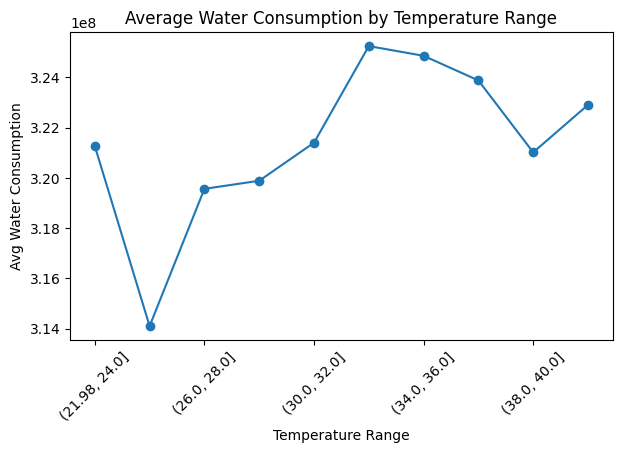

In [18]:
df['temp_bin'] = pd.cut(df['temperature_celsius_water'], bins=10)

avg_by_temp = df.groupby('temp_bin')['water_consumption_liters'].mean()

plt.figure(figsize=(7,4))
avg_by_temp.plot(marker='o')
plt.title("Average Water Consumption by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Avg Water Consumption")
plt.xticks(rotation=45)
plt.show()


### *Consumption vs Temperature Over Time*

In [19]:
#Consumption vs Temperature Over Time
df['month_year'] = df['date'].dt.to_period('M')

monthly_df = df.groupby('month_year').agg({
    'water_consumption_liters': 'mean',
    'temperature_celsius_water': 'mean'
}).reset_index()

monthly_df['month_year'] = monthly_df['month_year'].astype(str)


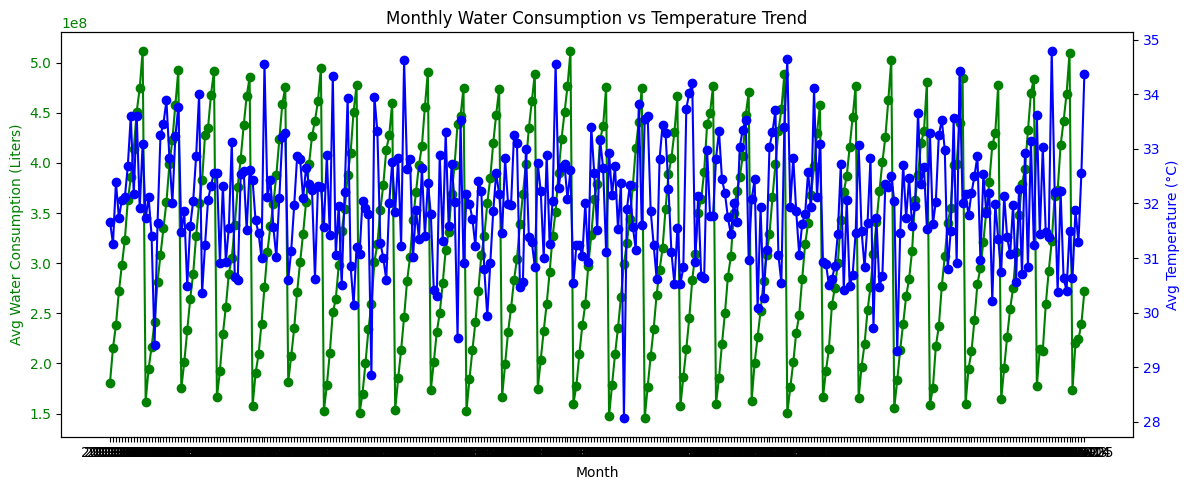

In [20]:
fig, ax1 = plt.subplots(figsize=(12,5))

ax1.set_xlabel("Month")
ax1.set_ylabel("Avg Water Consumption (Liters)", color="green")
ax1.plot(
    monthly_df['month_year'],
    monthly_df['water_consumption_liters'],
    color="green",
    marker='o',
    label="Avg Consumption"
)
ax1.tick_params(axis='y', labelcolor="green")

ax2 = ax1.twinx()
ax2.set_ylabel("Avg Temperature (°C)", color="blue")
ax2.plot(
    monthly_df['month_year'],
    monthly_df['temperature_celsius_water'],
    color="blue",
    marker='o',
    label="Avg Temperature"
)
ax2.tick_params(axis='y', labelcolor="blue")

plt.title("Monthly Water Consumption vs Temperature Trend")
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


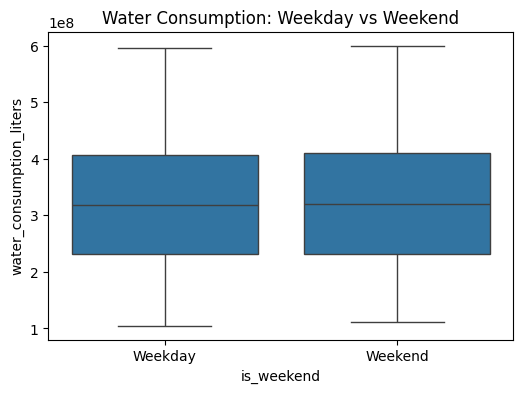

In [21]:
#WEEKDAY vs WEEKEND COMPARISON
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df['is_weekend'],
    y=df['water_consumption_liters']
)
plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title("Water Consumption: Weekday vs Weekend")
plt.show()


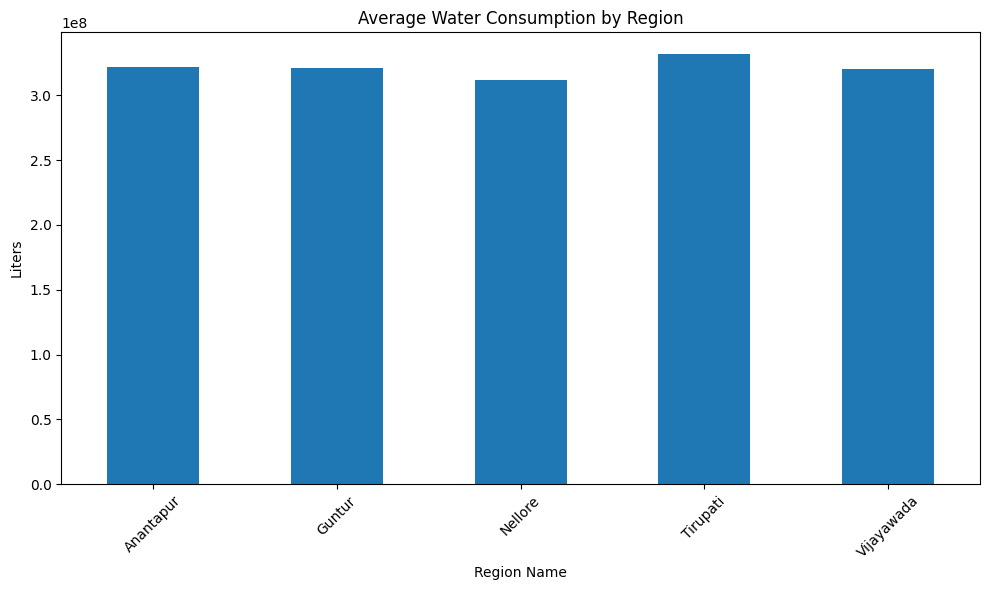

In [22]:
region_avg_data = {}

# Get list of one-hot encoded region columns
region_cols = [col for col in df.columns if col.startswith('region_name_')]

# Determine the implicitly dropped region (assuming it's 'Anantapur' from population_df)
# This region is represented when all other region_name_X columns are False
other_regions_condition = (df[region_cols] == False).all(axis=1)
region_avg_data['Anantapur'] = df.loc[other_regions_condition, 'water_consumption_liters'].mean()

# Calculate mean for other explicit regions
for col in region_cols:
    region_name = col.replace('region_name_', '')
    region_avg_data[region_name] = df.loc[df[col] == True, 'water_consumption_liters'].mean()

region_avg = pd.Series(region_avg_data)

plt.figure(figsize=(10,6))
region_avg.plot(kind='bar')
plt.title("Average Water Consumption by Region")
plt.ylabel("Liters")
plt.xlabel("Region Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## STEP 6: Feature Engineering

### *Date-Based Features*

In [23]:
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week
df['year'] = df['date'].dt.year
print(df[['date', 'day', 'week', 'year']].head())


        date  day  week  year
0 2019-01-01    1     1  2019
1 2019-01-02    2     1  2019
2 2019-01-03    3     1  2019
3 2019-01-04    4     1  2019
4 2019-01-05    5     1  2019


### *Lag Features*

In [24]:
df['lag_1'] = df['water_consumption_liters'].shift(1)
df['lag_7'] = df['water_consumption_liters'].shift(7)
df['rolling_7'] = df['water_consumption_liters'].rolling(7).mean()
print(df[['water_consumption_liters', 'lag_1', 'lag_7', 'rolling_7']].head(10))


   water_consumption_liters        lag_1        lag_7     rolling_7
0                 128495844          NaN          NaN           NaN
1                 175153526  128495844.0          NaN           NaN
2                 163816712  175153526.0          NaN           NaN
3                 131627810  163816712.0          NaN           NaN
4                 181791483  131627810.0          NaN           NaN
5                 187309311  181791483.0          NaN           NaN
6                 189542449  187309311.0          NaN  1.653910e+08
7                 171197356  189542449.0  128495844.0  1.714912e+08
8                 194634428  171197356.0  175153526.0  1.742742e+08
9                 200512588  194634428.0  163816712.0  1.795165e+08


### *Per Capita & Derived Metrics*

In [25]:
df['consumption_per_capita'] = df['water_consumption_liters'] / df['population']
print(df[['water_consumption_liters', 'population', 'consumption_per_capita']].head())

   water_consumption_liters  population  consumption_per_capita
0                 128495844      397272              323.445508
1                 175153526     1078467              162.409722
2                 163816712      464448              352.712708
3                 131627810     1010113              130.309985
4                 181791483      917405              198.158374


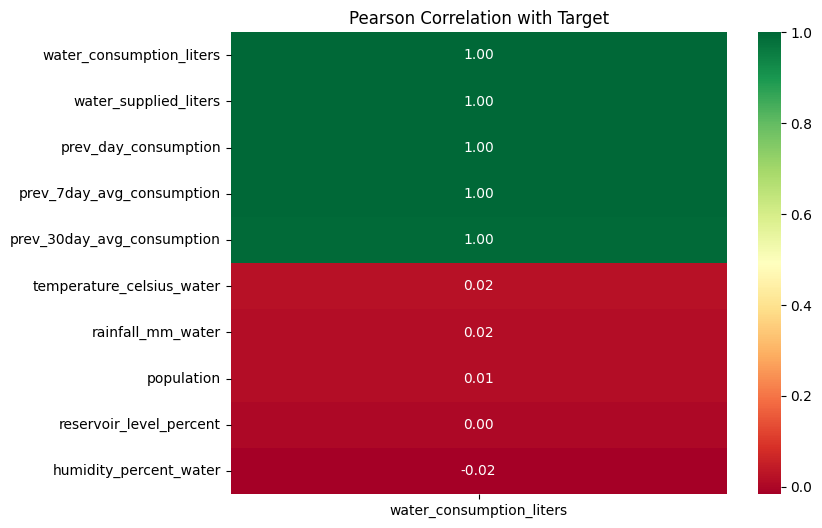

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only important features
selected_cols = [
    'water_consumption_liters',
    'temperature_celsius_water',
    'humidity_percent_water',
    'rainfall_mm_water',
    'population',
    'prev_day_consumption',
    'prev_7day_avg_consumption',
    'prev_30day_avg_consumption',
    'water_supplied_liters',
    'reservoir_level_percent'
]

# Recalculate corr for the selected columns (it was already done, but good to be explicit)
corr = df[selected_cols].corr()

# Define the target variable
target = 'water_consumption_liters'

plt.figure(figsize=(8,6))
sns.heatmap(
    corr[[target]].sort_values(by=target, ascending=False),
    annot=True,
    cmap="RdYlGn",
    fmt=".2f"
)
plt.title("Pearson Correlation with Target")
plt.show()

## STEP 7: Statistics & Probability Analysis

### *Distribution Analysis*

Text(0.5, 1.0, 'Water Consumption Distribution')

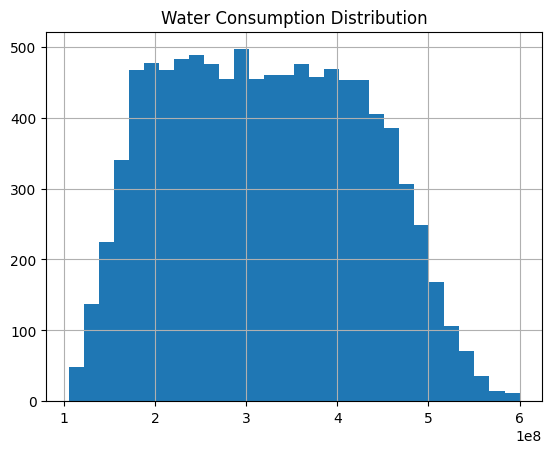

In [27]:
df['water_consumption_liters'].hist(bins=30)
plt.title("Water Consumption Distribution")


### *Normality Check*

In [28]:
from scipy.stats import skew, kurtosis

skew(df['water_consumption_liters'])
kurtosis(df['water_consumption_liters'])
print("Skewness:", skew(df['water_consumption_liters']))
print("Kurtosis:", kurtosis(df['water_consumption_liters']))


Skewness: 0.11104342473728927
Kurtosis: -0.9645944049834183


### *Probability Insight*

Probability of high demand day: 0.1


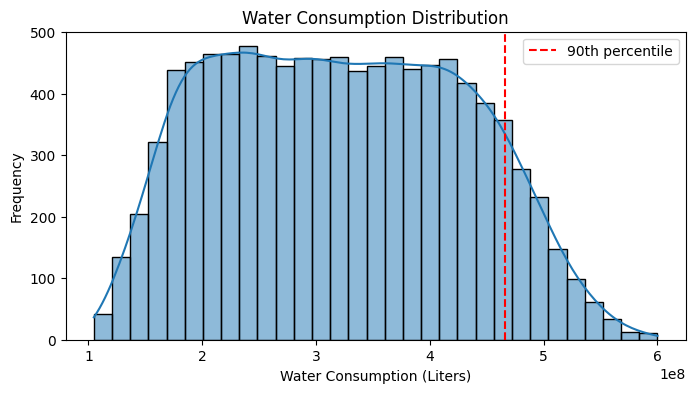

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Probability calculation
threshold = df['water_consumption_liters'].quantile(0.9)
high_demand_days = df[df['water_consumption_liters'] > threshold]

prob = len(high_demand_days) / len(df)
print("Probability of high demand day:", prob)

# PLOT the distribution
plt.figure(figsize=(8,4))
sns.histplot(df['water_consumption_liters'], kde=True)

# Mark threshold line
plt.axvline(threshold, color='red', linestyle='--', label='90th percentile')

plt.title("Water Consumption Distribution")
plt.xlabel("Water Consumption (Liters)")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## STEP 8: Feature Selection

### *Correlation-Based Selection*

In [30]:
corr_target = df.select_dtypes(include=['number']).corr()['water_consumption_liters'].sort_values(ascending=False)
print(corr_target)

water_consumption_liters             1.000000
water_supplied_liters                0.999868
prev_day_consumption                 0.999856
prev_7day_avg_consumption            0.998380
prev_30day_avg_consumption           0.995871
same_day_last_year_consumption       0.983986
month                                0.944122
rolling_7                            0.931946
week                                 0.921612
lag_1                                0.895004
lag_7                                0.807958
consumption_per_capita               0.430091
day                                  0.091507
temperature_celsius_water            0.019604
input_temperature                    0.019604
max_temperature_celsius              0.017545
min_temperature_celsius              0.017349
heat_index                           0.015407
rainfall_mm_water                    0.015041
input_rainfall                       0.015041
number_of_households                 0.014956
population                        

### *Model-Based Feature Importance*

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Select top 10 correlated features (excluding the target itself)
top_features = corr_target.index[1:11].tolist()
df_selected = df[top_features + ['water_consumption_liters']].dropna()

X = df_selected.drop('water_consumption_liters', axis=1)
y = df_selected['water_consumption_liters']

model = RandomForestRegressor()
model.fit(X, y)

importance = pd.Series(model.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(10)
print(importance.sort_values(ascending=False).head(10))


water_supplied_liters             0.814408
prev_day_consumption              0.185494
prev_7day_avg_consumption         0.000020
prev_30day_avg_consumption        0.000016
same_day_last_year_consumption    0.000015
lag_7                             0.000013
lag_1                             0.000013
rolling_7                         0.000011
week                              0.000007
month                             0.000002
dtype: float64


## step:9DATA VISUALIZATION

### *Time-Series Trend*

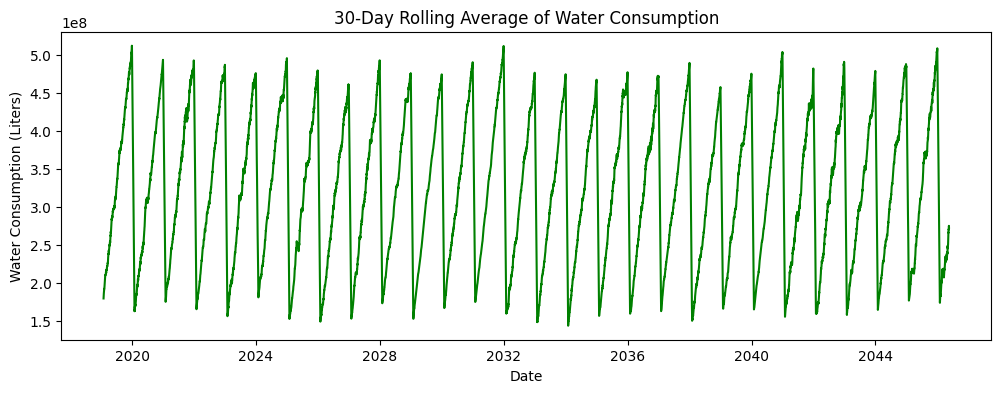

In [33]:
df_sorted = df.sort_values('date')
df_sorted['rolling_30'] = df_sorted['water_consumption_liters'].rolling(30).mean()

plt.figure(figsize=(12,4))
plt.plot(df_sorted['date'], df_sorted['rolling_30'], color='green')
plt.title("30-Day Rolling Average of Water Consumption")
plt.xlabel("Date")
plt.ylabel("Water Consumption (Liters)")
plt.show()


### *Seasonal Analysis*

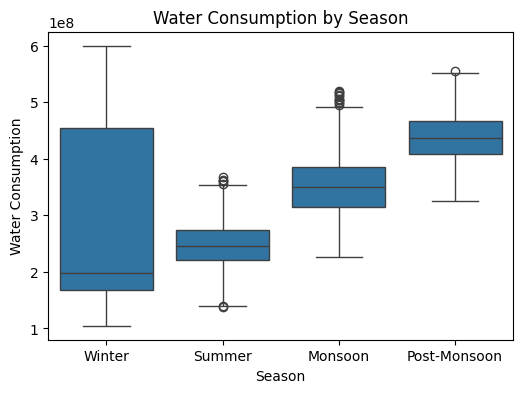

In [35]:
# Create a temporary 'season_cat' column for plotting from one-hot encoded columns
temp_df = df.copy()
temp_df['season_cat'] = 'Monsoon' # Default to the implicitly dropped season
temp_df.loc[temp_df['season_Post-Monsoon'] == True, 'season_cat'] = 'Post-Monsoon'
temp_df.loc[temp_df['season_Summer'] == True, 'season_cat'] = 'Summer'
temp_df.loc[temp_df['season_Winter'] == True, 'season_cat'] = 'Winter'

plt.figure(figsize=(6,4))
sns.boxplot(
    x='season_cat',
    y='water_consumption_liters',
    data=temp_df
)
plt.title("Water Consumption by Season")
plt.xlabel("Season")
plt.ylabel("Water Consumption")
plt.show()


### *Rainfall vs Water Consumption*

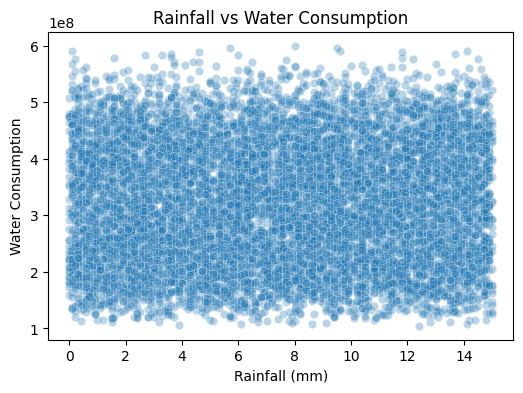

In [36]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['rainfall_mm_water'],
    y=df['water_consumption_liters'],
    alpha=0.3
)

plt.title("Rainfall vs Water Consumption")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Water Consumption")
plt.show()


### *Weekend vs Weekday Consumption*

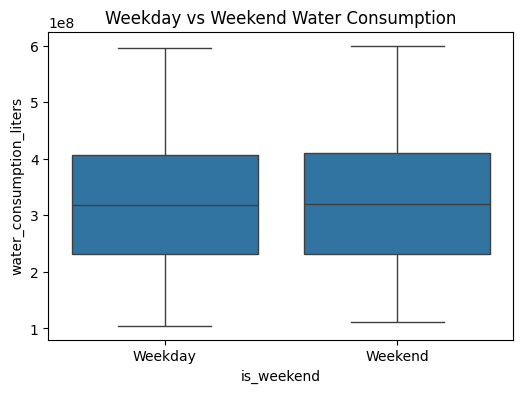

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='is_weekend',
    y='water_consumption_liters',
    data=df
)

plt.xticks([0,1], ['Weekday', 'Weekend'])
plt.title("Weekday vs Weekend Water Consumption")
plt.show()


### *Region-wise Comparison*

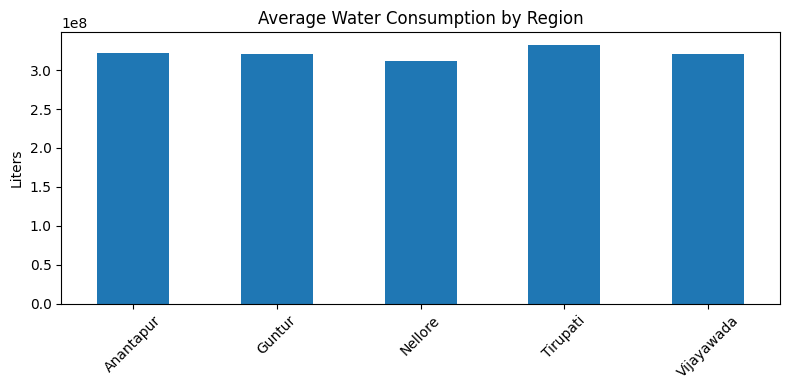

In [39]:
plt.figure(figsize=(8,4))
region_avg.plot(kind='bar')

plt.title("Average Water Consumption by Region")
plt.ylabel("Liters")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### *High-Demand Probability Visualization*

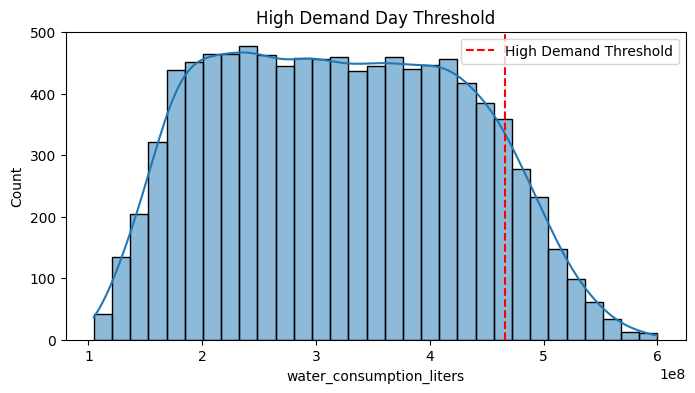

In [40]:
threshold = df['water_consumption_liters'].quantile(0.9)

plt.figure(figsize=(8,4))
sns.histplot(df['water_consumption_liters'], kde=True)
plt.axvline(threshold, color='red', linestyle='--', label='High Demand Threshold')

plt.title("High Demand Day Threshold")
plt.legend()
plt.show()


## STEP 10: Final Dataset Ready for ML

Final dataset shape for ML: (9993, 11)


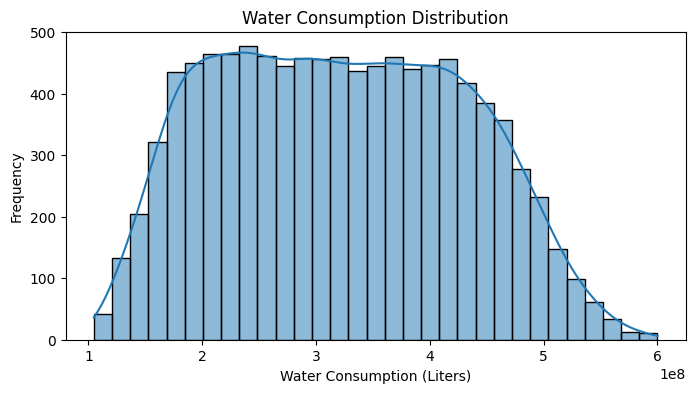

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Final ML-ready dataset
df_model = df_selected.dropna()
print("Final dataset shape for ML:", df_model.shape)

# PLOT the distribution
plt.figure(figsize=(8,4))
sns.histplot(df_model['water_consumption_liters'], kde=True)

plt.title("Water Consumption Distribution")
plt.xlabel("Water Consumption (Liters)")
plt.ylabel("Frequency")
plt.show()
